# MULTIPLE POLYNOMIAL REGRESSION

<b>The data set used is the data set containing the real estate market information. It includes the number of rooms, the age of the building, the number of floors, square meters, and the price information.

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import math

In [122]:
# df = pd.read_csv(r'C:\GitHub\DataScience\Supervised Learning\Multiple Polynomial Regression\real_estate.csv')
df = pd.read_csv(r'C:\GitHub\DataScience\Supervised Learning\Multiple Polynomial Regression\real_estate.csv', index_col="Unnamed: 0")
df.head()

,price,rooms,m2,floor,age
0,475,1,40,0,6
1,475,1,55,0,5
2,450,1,50,0,7
3,450,1,55,1,6
4,475,1,45,2,7


In [123]:
# df.drop('Unnamed: 0',axis=1,inplace=True)

In [124]:
# df.to_csv('real_estate.csv')

<b>Hold-Out

In [125]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<b>Polynomial Degree Generating Function

In [126]:
from sklearn.preprocessing import PolynomialFeatures

<b>We create the polynomial degrees of the features from the second order to the tenth order and calculate the error score of the model created with each polynomial degree. Here we use RMSE as the error score.

In [127]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

<b>The R2 measure can be overly sensitive when it comes to polynomial functions. Therefore, RMSE is widely used for error score when Grid Search is done to determine the appropriate polynomial degree.

<b>Train set Features</b>

In [128]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

Updated by TroySAJordan to be reusable based on future uses of the same function.

In [175]:
def get_bestfit_rmse_degree(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame, max_degree: int = 10):
    """Determine best Degree for fitting Polynomial Regression using the Root Mean Squared Error algorithm (RMSE)

    Args:
        X_train (pd.DataFrame): The Training Set Feature/s which are to be used to predicted the model
        y_train (pd.DataFrame): The Training Set Result which is to be predicted by the model
        X_test (pd.DataFrame): The Test Set Feature/s which are used by the Model to predicted the Result
        y_test (pd.DataFrame): The Test Set Result from the model, used to verify the error of the model
        max_degree (int, optional): The Maximum degree for the Polynomial to use, Defaults to 10 MAX.

    Returns:
        pd.DataFrame: DataFrame of Degree (index), RMSE 
    """
    _rmses = []
    _degrees = np.arange(1,max_degree+1)
    _min_rmse, _min_deg = 1e10, 0
    _df = pd.DataFrame(columns=["RMSE"], dtype=np.longdouble)

    for _deg in _degrees:
        _poly_features = PolynomialFeatures(degree=_deg,include_bias=False)

        _X_poly_train = _poly_features.fit_transform(X_train)

        # Linear Reg.
        _poly_reg = LinearRegression().fit(_X_poly_train,y_train)

        # Comparison with test set
        _X_poly_test = _poly_features.fit_transform(X_test)
        _poly_predict = _poly_reg.predict(_X_poly_test)
        _poly_mse = mean_squared_error(y_test, _poly_predict)
        _poly_rmse = np.sqrt(mean_squared_error(y_test, _poly_predict))
        # _rmses.append(_poly_rmse)
        _df.loc[_deg] = _poly_rmse

        if _min_rmse > _poly_rmse:
            _min_rmse = _poly_rmse
            _min_deg = _deg
    
    return _df
_df = get_bestfit_rmse_degree(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
_df

,RMSE
1,6.162223e+01
2,8.849199e+01
3,1.083139e+06
4,1.463525e+06
5,8.852171e+05
6,4.573788e+06
7,1.392922e+06
8,1.068775e+06
9,8.166206e+05
10,9.639302e+05


In [131]:
# print(f'Best Model RMSE :{min_rmse} degree :{min_deg}')
print(f'Best Model RMSE :{math.min()} degree :{min_deg}')

Best Model RMSE :56.48843719880524 degree :2


<b>RMSE scores for all polynomial values on the graph

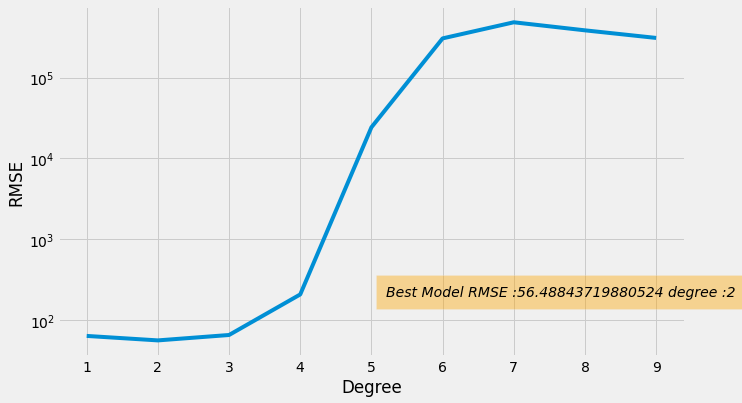

In [132]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(degrees,rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.text(5.2,200,(f'Best Model RMSE :{min_rmse} degree :{min_deg}'),style='italic',
         bbox={'facecolor' : 'orange', 'alpha' : 0.4, 'pad' : 10})
plt.show()

In [133]:
_df = get_bestfit_rmse_degree(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
_df

,RMSE
1,64.148296
2,56.488437
3,65.872443
4,208.874346
5,24269.134554
6,304573.677869
7,481674.249166
8,383064.637617
9,308587.602560
10,341713.054600


<b>The lowest error score is obtained when we take the polynomial degrees of all the features in the second degree. Now that we have determined the appropriate polynomial degree as 2, we can now create the model according to this polynomial degree and look at its performance in the test set.

In [134]:
poly_deg = PolynomialFeatures(degree=2)
X_train_poly = poly_deg.fit_transform(X_train)
X_test_poly = poly_deg.fit_transform(X_test)

In [135]:
poly_reg =LinearRegression().fit(X_train_poly,y_train)

model = LinearRegression().fit(X_train,y_train)

<b>Prediction performance of multilinear model for training and test sets

In [136]:
print(f'Linear Reg Train R2 :{model.score(X_train,y_train)}')
print(f'Linear Reg Test R2 :{model.score(X_test,y_test)}')

Linear Reg Train R2 :0.733739961656849
Linear Reg Test R2 :0.6987282352837991


<b>Prediction performance of multiple polynomial model for training and test sets

In [137]:
print(f'Polynomial Reg Train R2 :{poly_reg.score(X_train_poly,y_train)}')
print(f'Polynomial Reg Test R2 :{poly_reg.score(X_test_poly,y_test)}')

Polynomial Reg Train R2 :0.8488074651060601
Polynomial Reg Test R2 :0.7663814623334081


In [138]:
X_poly = poly_deg.transform(X)
df['price_pred'] = poly_reg.predict(X_poly)

<b>Graph

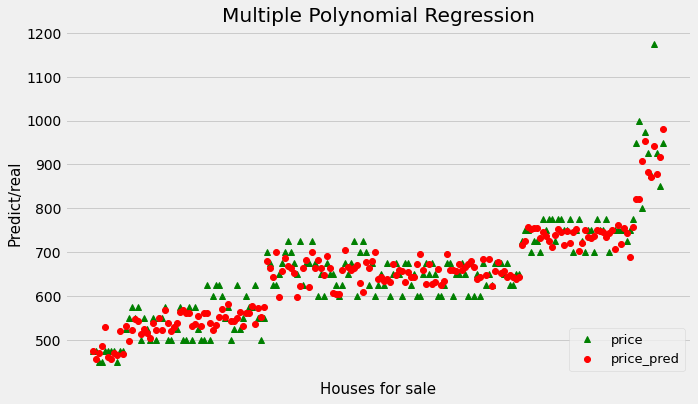

In [139]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('Multiple Polynomial Regression')
plt.xticks(df['price'],df.index.values)
plt.plot(df['price'],'g^',label='price')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='price_pred')
plt.xlabel('Houses for sale',fontsize=15)
plt.ylabel('Predict/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()

# DETERMINING THE SUITABLE POLYNOMIAL DEGREE

<b> Is there really a non-linear relationship between the prices of the flats for sale and each property? Can't the relation of the target variable with some properties be linear/polynomial with their own self or even if the relation of the target variable with the properties is curvilinear, does it have the same degree of polynomial relation with each of them?

In [140]:
# df = pd.read_csv('real_estate.csv')
df = pd.read_csv(r'C:\GitHub\DataScience\Supervised Learning\Multiple Polynomial Regression\real_estate.csv', index_col="Unnamed: 0")
df.head()

,price,rooms,m2,floor,age
0,475,1,40,0,6
1,475,1,55,0,5
2,450,1,50,0,7
3,450,1,55,1,6
4,475,1,45,2,7


In [141]:
# df.drop('Unnamed: 0',axis=1,inplace=True)

In [142]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

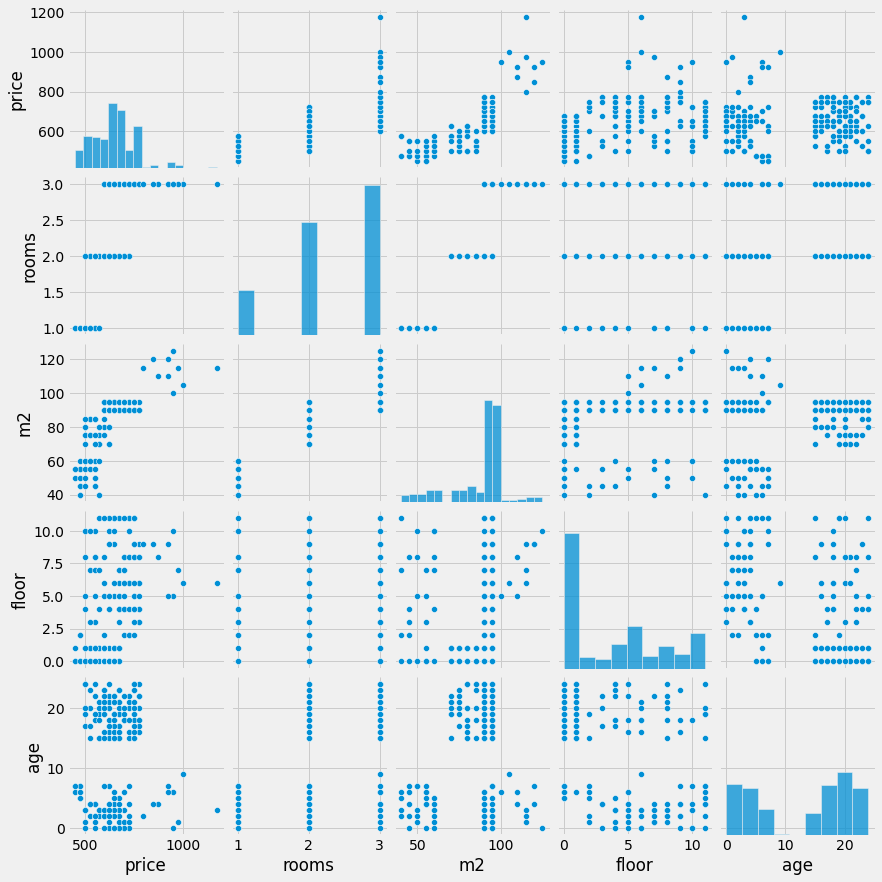

In [143]:
g = sns.pairplot(df)

<b>At first glance, a linear relationship between the price and the number of rooms can be clearly seen. We cannot say that there is a linear relationship with the same precision about the data points obtained from the scatter diagrams of the other properties of house prices.

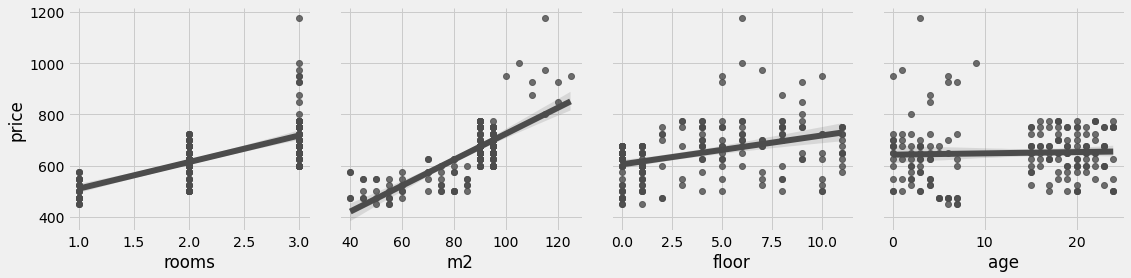

In [144]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['rooms','m2','floor','age'],height=4)

g.map(sns.regplot,lowess=False,color='.3')

<b>When we look at the Local Regression curves, we can observe the trends of the data points. The lowess curve of the price and the number of rooms was not created because these two have a perfectly linear relationship. At first glance, the relationship between house prices and the measurement of the width, the floor and the age of the building does not seem linear. In addition, it can be seen that the polynomial relationship between the face measurement variable and the floor where the house is located and the age of the building is not of the same degree with the target variable.

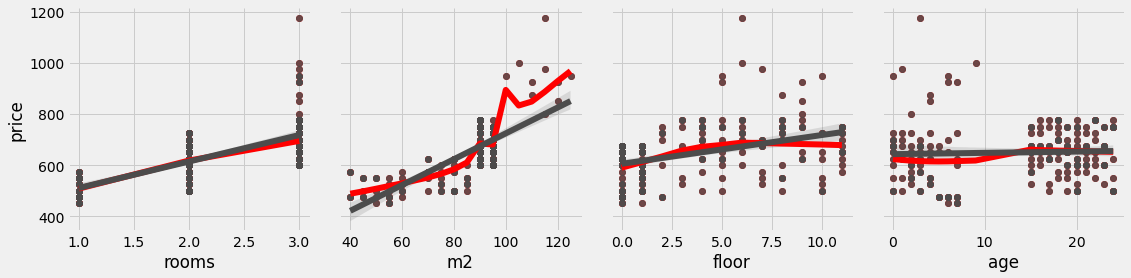

In [145]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['rooms','m2','floor','age'],height=4)

g.map(sns.regplot,lowess=True,color='red')
g.map(sns.regplot,lowess=False,color='.3')

<b>While the relation of the target variable with the number of rooms is linear, its relation with the other properties of the houses is not linear. This is pretty obvious, especially for the m2 and floor variables.

<b>When estimating with polynomial regression, we do not need to take the polynomial degrees of the room number and age variables. We will use them as they are in the model.

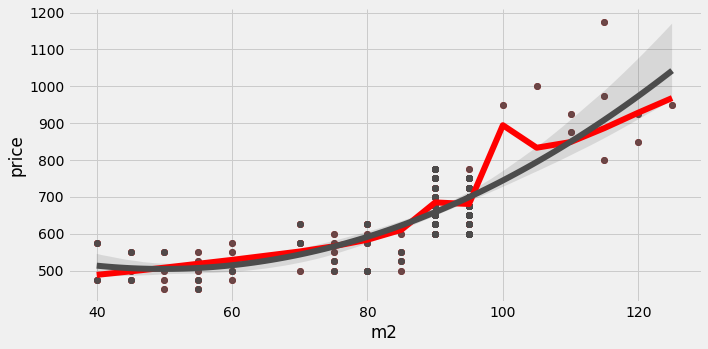

In [146]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['m2'],height=5,aspect=2)

g.map(sns.regplot,lowess=True,color='red')  # Lowess curve
g.map(sns.regplot,lowess=False,color='.3',order=2)

|<b>polynomial degree for price - floor relation

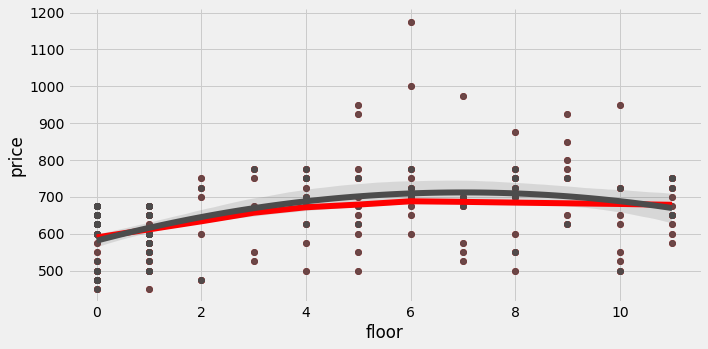

In [147]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['floor'],height=5,aspect=2)

g.map(sns.regplot,lowess=True,color='red')  # Lowess curve
g.map(sns.regplot,lowess=False,color='.3',order=2)

<b>Now, let's set the model by determining the appropriate polynomial degrees for the features that have a polynomial relationship with the target variable.

<b>Train

In [148]:
df_train = pd.concat([y_train,X_train],axis=1,sort=True)

X1_train = df_train['rooms'].values.reshape(-1,1)
X2_train = df_train['m2'].values.reshape(-1,1)
X3_train = df_train['floor'].values.reshape(-1,1)
X4_train = df_train['age'].values.reshape(-1,1)

<b>Test

In [149]:
df_test = pd.concat([y_test,X_test],axis=1,sort=True)

X1_test = df_test['rooms'].values.reshape(-1,1)
X2_test = df_test['m2'].values.reshape(-1,1)
X3_test = df_test['floor'].values.reshape(-1,1)
X4_test = df_test['age'].values.reshape(-1,1)

<b>RMSE scores for all degrees of Polynomial

# 1-) rooms

In [150]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [151]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X1_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X1_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

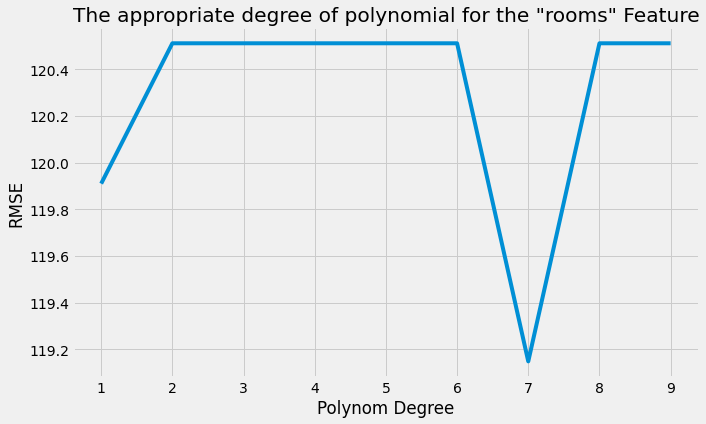

In [152]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "rooms" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 2-)m2

In [153]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [154]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X2_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X2_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

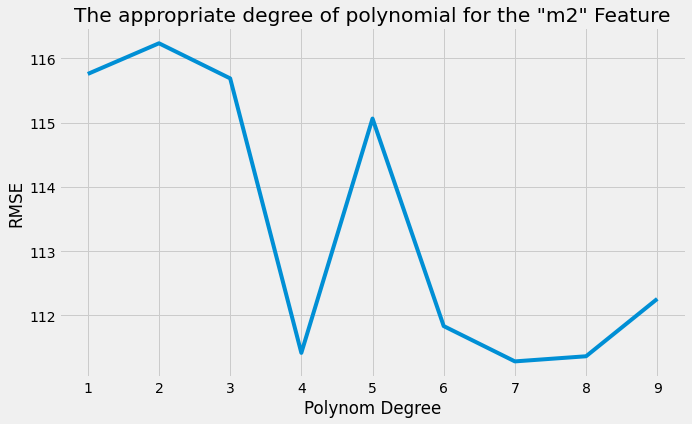

In [155]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "m2" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 3-)floor

In [156]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [157]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X3_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X3_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

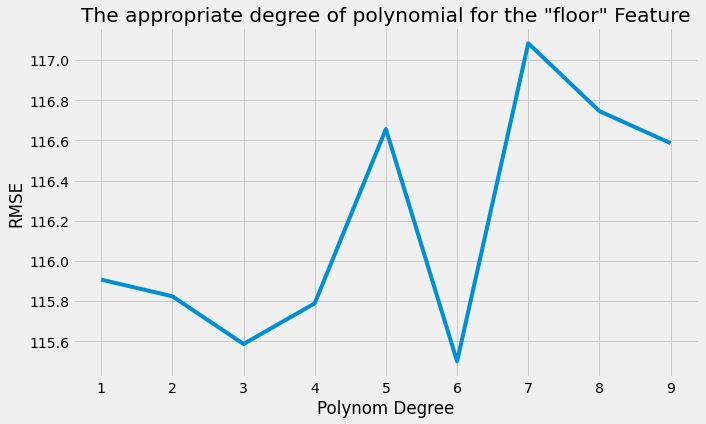

In [158]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "floor" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 4-) age

In [159]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [160]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X4_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X4_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

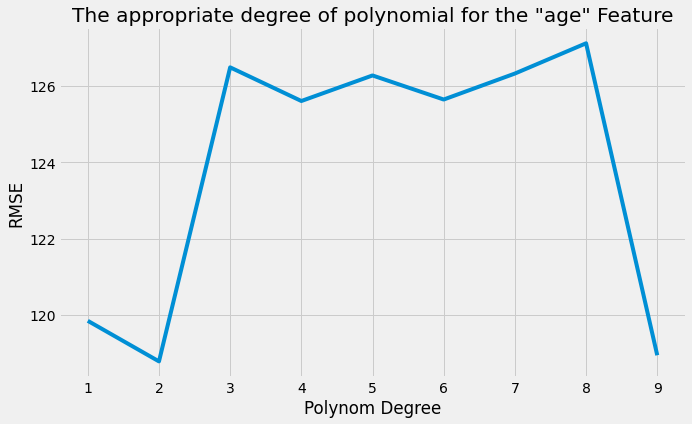

In [161]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "age" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# The appropriate polynomial degrees of the features are determined as (1,7,6,2), respectively.

# MODEL

In [162]:
poly_features = PolynomialFeatures(degree=1)
X1_train = poly_features.fit_transform(X1_train)
X1_test = poly_features.fit_transform(X1_test)

poly_features = PolynomialFeatures(degree=7)
X2_train = poly_features.fit_transform(X2_train)
X2_test = poly_features.fit_transform(X2_test)

poly_features = PolynomialFeatures(degree=6)
X3_train = poly_features.fit_transform(X3_train)
X3_test = poly_features.fit_transform(X3_test)

poly_features = PolynomialFeatures(degree=2)
X4_train = poly_features.fit_transform(X4_train)
X4_test = poly_features.fit_transform(X4_test)

In [163]:
X_train1 = np.concatenate((X1_train,X2_train,X3_train,X4_train),axis=1)
X_test1 = np.concatenate((X1_test,X2_test,X3_test,X4_test),axis=1)

<b>Let's create and add interaction terms

In [164]:
X_train['int1'] = X_train['rooms'].mul(X_train['m2'])
X_train['int2'] = X_train['rooms'].mul(X_train['floor'])
X_train['int3'] = X_train['rooms'].mul(X_train['age'])
X_train['int4'] = X_train['m2'].mul(X_train['floor'])
X_train['int5'] = X_train['m2'].mul(X_train['age'])
X_train['int6'] = X_train['floor'].mul(X_train['age'])

In [165]:
X_test['int1'] = X_test['rooms'].mul(X_test['m2'])
X_test['int2'] = X_test['rooms'].mul(X_test['floor'])
X_test['int3'] = X_test['rooms'].mul(X_test['age'])
X_test['int4'] = X_test['m2'].mul(X_test['floor'])
X_test['int5'] = X_test['m2'].mul(X_test['age'])
X_test['int6'] = X_test['floor'].mul(X_test['age'])

In [166]:
X_train2 = np.array(X_train[['int1','int2','int3','int4','int5','int6']])

X_test2 = np.array(X_test[['int1','int2','int3','int4','int5','int6']])

In [167]:
X_train1 = np.concatenate((X_train1, X_train2),axis=1)
X_test1 = np.concatenate((X_test1, X_test2),axis=1)

<b>Let's train the polynomial regression algorithm

In [168]:
poly_reg = LinearRegression().fit(X_train1,y_train)

In [169]:
print(f'Polynomial Reg Train R2 :{poly_reg.score(X_train1,y_train)}')
print(f'Polynomial Reg Test R2 :{poly_reg.score(X_test1,y_test)}')

Polynomial Reg Train R2 :0.8075959419478881
Polynomial Reg Test R2 :0.7579451215143707


<b>Comparing training dataset predictions with actual values

In [170]:
y_pred_train = poly_reg.predict(X_train1)

for i, prediction in enumerate(y_pred_train):
    print(f'pred_price : {prediction}  real_price : {y[i]}')

pred_price : 542.0999731270209  real_price : 475
pred_price : 668.9023801629761  real_price : 475
pred_price : 532.6208936051722  real_price : 450
pred_price : 689.8431524237227  real_price : 450
pred_price : 684.8961800727244  real_price : 475
pred_price : 650.6951842861041  real_price : 475
pred_price : 558.5369310344983  real_price : 475
pred_price : 658.3899339877067  real_price : 475
pred_price : 545.6665845733438  real_price : 450
pred_price : 670.0916459912338  real_price : 475
pred_price : 869.735764218504  real_price : 475
pred_price : 538.5327088393775  real_price : 525
pred_price : 774.7018271957722  real_price : 550
pred_price : 517.7017160406327  real_price : 575
pred_price : 565.7098769508335  real_price : 550
pred_price : 678.1563479600251  real_price : 575
pred_price : 547.2058718755112  real_price : 500
pred_price : 688.4015537218789  real_price : 550
pred_price : 657.751949616537  real_price : 525
pred_price : 495.87144720382605  real_price : 500
pred_price : 561.6756

<b>Comparing test dataset predictions with actual values

In [171]:
y_pred_test = poly_reg.predict(X_test1)

for i, prediction in enumerate(y_pred_test):
    print(f'pred_price : {prediction}  real_price : {y[i]}')

pred_price : 696.4829961809907  real_price : 475
pred_price : 667.0826857975868  real_price : 475
pred_price : 769.8428385542726  real_price : 450
pred_price : 663.7285783713256  real_price : 450
pred_price : 684.4869516906352  real_price : 475
pred_price : 509.1218145840627  real_price : 475
pred_price : 502.9987337423961  real_price : 475
pred_price : 505.17717716411664  real_price : 475
pred_price : 631.2585042047236  real_price : 450
pred_price : 668.2011276594227  real_price : 475
pred_price : 654.3601277251097  real_price : 475
pred_price : 724.9918136754083  real_price : 525
pred_price : 510.5745949711369  real_price : 550
pred_price : 733.34377385965  real_price : 575
pred_price : 695.6953080155168  real_price : 550
pred_price : 817.26318497868  real_price : 575
pred_price : 722.2701289516796  real_price : 500
pred_price : 673.2688418609565  real_price : 550
pred_price : 736.8868617310023  real_price : 525
pred_price : 504.436432003257  real_price : 500
pred_price : 535.7423442

In [172]:
pred_price = np.append(y_pred_train,y_pred_test)
df['pred_price'] = pred_price

# Graph

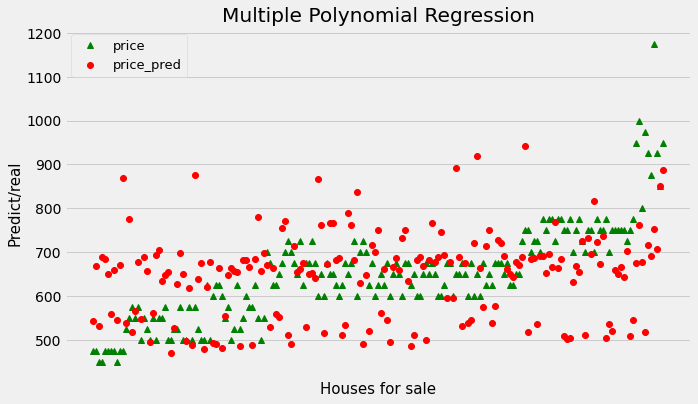

In [173]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('Multiple Polynomial Regression')
plt.xticks(df['price'],df.index.values)
plt.plot(df['price'],'g^',label='price')
plt.xticks(df['pred_price'],df.index.values)
plt.plot(df['pred_price'],'ro',label='price_pred')
plt.xlabel('Houses for sale',fontsize=15)
plt.ylabel('Predict/real',fontsize=15)
plt.legend(fontsize=13,loc='upper left')
plt.show()